# 有关Stroop效应的数据分析报告

## 一. 问题背景

### 1. Stroop效应

维基百科对“Stroop效应”的解释为：

> "斯特鲁普效应(Stroop effect)是指在心理学中干扰对反应时间影响的实验。这是1935年实验心理学家史楚普（John Ridley Stroop）所提出的著名的发现之一，指出环境刺激物理的各项特征，如果相融，则会使辨识加速，反应时间缩短；但若互不相融，则会造成干扰，使反应时间拉长。例如当测试者被要求说出某个颜色和其字面意义不符的词语时，被测者往往会反应速度下降，出错率上升。"

本数据分析报告对一份样本容量为25的测试样本进行相关的假设检验研究。

### 2. 体验Stroop效应

通过实验指导文档中提供的连接进行了一次Stroop测试，在一致条件下使用的时间为**18.655s**，在不一致条件下使用的时间为**38.823s**。

## 二. 对Stroop效应的数据分析

### 1. 自变量和因变量

实验中的自变量为不同类型的测试条件，包括一致性测试条件（字面意思与颜色一致）和不一致性测试条件（字面意思与颜色不一致）；因变量为完成该测试需要花费的时间（单位：秒）。

### 2. 假设集

用$\mu_I$表示在不一致条件下进行测试所花平均时间，用$\mu_C$表示在一致条件下进行测试所花平均时间，故：

$H_0$：不一致条件下进行测试所花平均时间与在一致条件下进行测试所花平均时间并无差异，即$\mu_I = \mu_C$；

$H_a$：不一致条件下进行测试所花平均时间与在一致条件下进行测试所花平均时间有显著的不同，即$\mu_I \neq \mu_C$。

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 3. 统计检验模型

该心理学实验是对同一受测者依次进行两种条件下的测试，然后分别记录其所花费的时间。由于两种测试之间有一种相互依赖的关系，且总体的参数未知，对这样的数据进行假设检验，第一判断是采用相依样本t-检验。但是在下结论之前，先来看看样本数据分布的直方图：

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f345010f290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f344cd9f190>]], dtype=object)

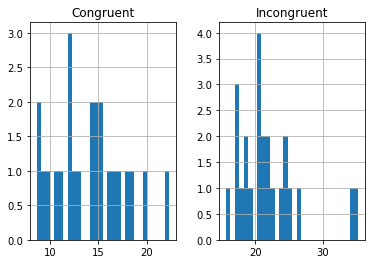

In [3]:
data = pd.read_csv('stroopdata.csv')
data.hist(bins=30)

从直方图中可以观察到，样本数据的分布**近似满足正态分布的形状**，加之我们对**两种条件下实验数据的测试是相互独立的**，因此满足使用t-分布的条件，所以决定对样本数据进行上述检验。

参考资料：[OpenIntro Statistics](https://www.openintro.org/stat/)，3rd，Chapter 5 Inference for numerical data，对t-分布使用前提条件的说明。

### 4. 描述性统计

In [4]:
print('Mean:')
print(data.mean())
print('\nMedian:')
print(data.median())

Mean:
Congruent      14.051125
Incongruent    22.015917
dtype: float64

Median:
Congruent      14.3565
Incongruent    21.0175
dtype: float64


样本均值：$\bar{x}_C=14.051125$，$\bar{x}_I=22.015917$。

一致性条件下样本数据中位数为14.3565，不一致条件下样本数据中位数为21.0175。

样本标准差$s_C=3.559358$，$s_I=4.797057$。

从这些数据上看，不一致条件下测试花费的时间要比一致条件下高。真的是这样吗？让我们通过柱状图来看一下两类测试数据的对比情况：

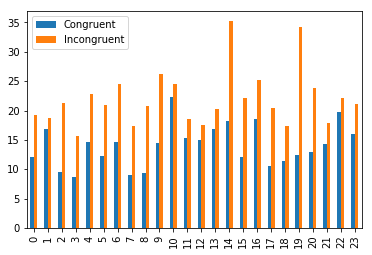

In [5]:
data.plot.bar()

从上图可以明显看出，不一致条件下进行测试所消耗的时间，无一例外都比一致条件下要高，有的甚至高了很多。

### 6. 对样本数据进行t检验

对总体均值差的点估计，为$$\mu_C-\mu_I=\bar{x}_C-\bar{x}_I=14.051125-22.015917=−7.964792$$


In [7]:
(data['Congruent']-data['Incongruent']).std()

4.864826910359056

然后对样本数据的差值求标准差，得到$s=23.33089025215998$，t统计量为$t=\frac{\mu_C-\mu_I}{s/\sqrt{n}}=−8.02070728$，P值$\le0.0001$，对自由度为23，$\alpha=0.05$而言，置信区间为[-10.02, -5.91]，其t临界值为$t_{critical}=\pm 2.069$，由于t统计量位于t临界区中，所以在这个情况下我们**应当拒绝零假设**，即该均值的差在$\alpha$为.05水平下具有统计显著性。

问题 5：执行统计检验并解读结果 正确执行并报告了一项统计检验，包括检验统计量、P值和检验结果。检验结果针对执行的试验任务进行了解释。

## 三. 结论

是否具有统计显著性？能否拒绝零假设？最终定论是？

解释观察到的效应的原因，类似效应的替代或类似任务

问题 6：更深入探索和扩展调查 对所观察效应的原因做了假设。提供了 所执行的 Stroop 任务的扩展或相关试验，这可能会得到类似的效应。